In [1]:
import tensorflow as tf

graph = tf.Graph()

with graph.as_default():
    gd = tf.GraphDef()
    with tf.gfile.GFile('optimized_graph.pb', 'rb') as f:
        serialized_graph = f.read()
        gd.ParseFromString(serialized_graph)
        tf.import_graph_def(gd, name='')
        
    input_tensor = graph.get_tensor_by_name('input_1:0')
    predictions_tensor = graph.get_tensor_by_name('predictions/Softmax:0')
    sess = tf.Session(graph=graph)

In [9]:
red_test_dir = '/home/dhlong/github/ros_img/test/state0red/'
green_test_dir = '/home/dhlong/github/ros_img/test/state2green/'
yellow_test_dir = '/home/dhlong/github/ros_img/test/state1yellow/'

from glob import glob

img_files = glob(yellow_test_dir + '*.png')

import cv2

img = cv2.imread(img_files[3])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,300))

(300, 400, 3)

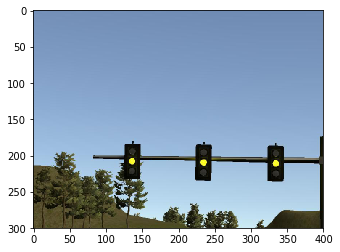

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img)
img.shape

In [11]:
sess.run(predictions_tensor, {input_tensor:[img]})

array([[  1.07539005e-26,   1.00000000e+00,   3.20741402e-25,
          0.00000000e+00]], dtype=float32)